In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

In [2]:
euler=np.genfromtxt('euler.csv',delimiter=',')
euler

array([[ 0.        , -0.03931294, -0.06257792, ..., -0.02019145,
        -0.01944537, -0.01926008],
       [ 0.        ,  0.01198825,  0.02286165, ...,  0.0289426 ,
         0.02887453,  0.02885828],
       [ 0.        ,  2.90382377,  2.54497479, ..., -0.06245205,
        -0.06237943, -0.06227517]])

In [3]:
phi,theta,psi=0,0,0
sensor=np.genfromtxt('sensor.csv',delimiter=',')

In [4]:
sensor

array([[-0.01489258, -0.24536133,  1.09106445, -0.23664122,  0.17557252,
         0.07633588],
       [-0.01220703, -0.25830078,  1.09277344, -0.14503817,  0.26717557,
         0.09923664],
       [-0.01318359, -0.23706055,  1.09350586, -0.16793893,  0.25954198,
         0.06870229],
       ...,
       [-0.01318359, -0.25292969,  1.08911133, -0.12977099,  0.22137405,
         0.07633588],
       [-0.01220703, -0.25097656,  1.08349609, -0.27480916,  0.19847328,
         0.07633588],
       [-0.01123047, -0.25048828,  1.08740234, -0.18320611,  0.19083969,
         0.08396947]])

In [5]:
accel=scipy.io.loadmat('ArsAccel.mat')
gyro=scipy.io.loadmat('ArsGyro.mat')

In [6]:
gyro

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Thu Feb 25 10:20:01 2010',
 '__version__': '1.0',
 '__globals__': [],
 'wx': array([[ 0.00015978],
        [ 0.00015978],
        [ 0.00319579],
        ...,
        [ 0.00063916],
        [-0.00431431],
        [-0.00639159]]),
 'wy': array([[ 0.00223706],
        [ 0.00319579],
        [-0.00095874],
        ...,
        [ 0.00319579],
        [ 0.006072  ],
        [ 0.00319579]]),
 'wz': array([[ 0.0014381 ],
        [-0.00335559],
        [-0.00191747],
        ...,
        [ 0.00527306],
        [-0.00047937],
        [ 0.00127831]])}

In [7]:
ax,ay,az=accel['fx'],accel['fy'],accel['fz']
gx,gy,gz=gyro['wx'],gyro['wy'],gyro['wz']

In [8]:
np.hstack([ax,ay,az,gx,gy,gz])[0]

array([ 3.90285000e-02, -4.44116400e-02,  2.91640356e+00,  1.59784893e-04,
        2.23705832e-03,  1.43809894e-03])

In [9]:
max(gyro['wx'])

array([0.69268819])

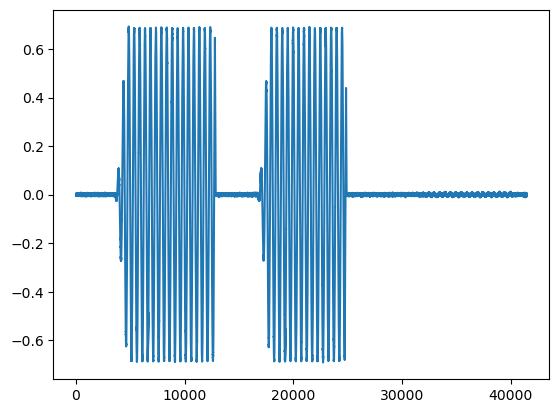

In [10]:
plt.plot(gyro['wx'])

In [11]:
accel['fx'][0]

array([0.0390285])

In [12]:
quats=np.array([0,0,0,0]).reshape(1,4)
phi_prev,theta_prev,psi_prev=0,0,0
phis=[0]
dt=0.01

for i in range(len(gyro['wx'])):
    Ax,Ay,Az,Gx,Gy,Gz=accel['fx'][i],accel['fy'][i],accel['fz'][i],gyro['wx'][i],gyro['wy'][i],gyro['wz'][i]
    phi,theta,psi=np.array([[1,np.sin(phi)*np.tan(theta),np.cos(phi)*np.tan(theta)],
                            [0,np.cos(phi),-np.sin(phi)],
                         [0,np.sin(phi)/np.cos(theta),np.cos(phi)/np.cos(theta)]])@np.vstack([Gx,Gy,Gz])[:,0]*dt+np.hstack([phi_prev,theta_prev,psi_prev])
    phi_prev,theta_prev,psi_prev=phi,theta,psi
    phis.append(phi*180/np.pi)
    cosphi=np.cos(phi/2)
    costhe=np.cos(theta/2)
    cospsi=np.cos(psi/2)
    sinphi=np.sin(phi/2)
    sinthe=np.sin(theta/2)
    sinpsi=np.sin(psi/2)

    z=np.array([
        [cosphi*costhe*cospsi+sinphi*sinthe*sinpsi],
        [sinphi*costhe*cospsi-cosphi*sinthe*sinpsi],
        [cosphi*sinthe*cospsi+sinphi*costhe*sinpsi],
        [cosphi*costhe*sinpsi-sinphi*sinthe*cospsi]
    ]).reshape(1,4)
    quats=np.append(quats,z,axis=0)

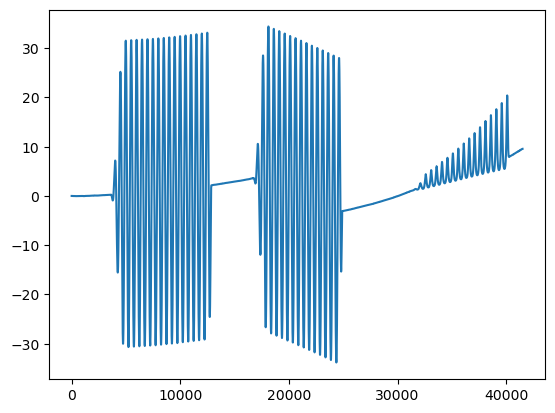

In [13]:
plt.plot(phis)

plt.show()

In [14]:
phi

0.16701583438289347

In [15]:
z=np.array([
        [cosphi*costhe*cospsi+sinphi*sinthe*sinpsi],
        [sinphi*costhe*cospsi-cosphi*sinthe*sinpsi],
        [cosphi*sinthe*cospsi+sinphi*costhe*sinpsi],
        [cosphi*costhe*sinpsi-sinphi*sinthe*cospsi]
    ])

In [16]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))


In [17]:
from scipy.spatial.transform import Rotation as R

In [18]:
a,b=R.align_vectors(np.array([0,0,1]).reshape(1,3),np.average(sensor[:10][:,:3],axis=0).reshape(1,3))

C:\Users\khb10\AppData\Local\Temp\ipykernel_25192\2127739296.py:1: UserWarning: Optimal rotation is not uniquely or poorly defined for the given sets of vectors.
  a,b=R.align_vectors(np.array([0,0,1]).reshape(1,3),np.average(sensor[:10][:,:3],axis=0).reshape(1,3))


In [19]:
np.average(sensor[:10][:,:3],axis=0)

array([ 0.26027832, -0.49501953,  0.83925781])

In [20]:
mod_sensor=a.apply(sensor[:,:3])
mod_sensor=mod_sensor/np.linalg.norm(mod_sensor,axis=1).reshape(600,1)*9.81

In [21]:
import pandas as pd

In [22]:
pd.DataFrame(np.array([accel['fx'],accel['fy'],accel['fz']]).T[0])

,0,1,2
0,0.039029,-0.044412,2.916404
1,0.022879,-0.005383,2.927170
2,0.044412,-0.039029,2.932553
3,0.012113,-0.021533,2.927170
4,0.033645,-0.049795,2.937936
...,...,...,...
41495,0.032299,-0.039029,2.894871
41496,0.028262,0.004037,2.893524
41497,0.022879,-0.021533,2.911020
41498,0.032299,-0.055178,2.884105


In [25]:
acc_angles=[]
for i in range(len(sensor)):
    Ax,Ay,Az,Gx,Gy,Gz=sensor[i]
    Ax,Ay,Az=a.apply([Ax,Ay,Az])
    theta=np.arctan(Ay/Az)
    phi=np.arctan(Ax/np.sqrt(Ay**2+Az**2))
    psi=0
    acc_angles.append([theta,phi,psi])

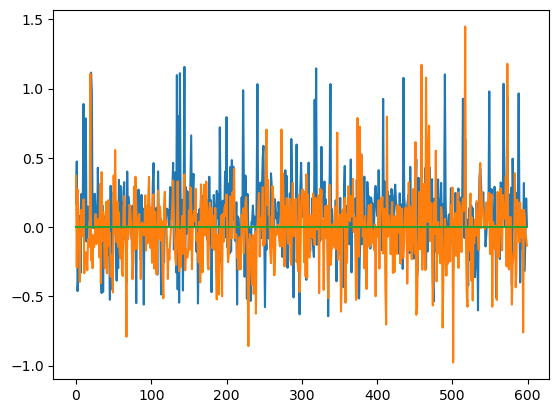

In [26]:
plt.plot(np.rad2deg(acc_angles))